In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Los datos tienen una frecuencia teorica de 512Hz. Datos sin procesar. Son datos raw del dispositivo. The signals are passed through analog and digital low and high pass filters to retain signals generally in the 1-50Hz range. After correcting for possible aliasing, these signals are ultimately sampled at 128Hz or 512Hz.

In [2]:
df = pd.read_csv(r"C:/Users/Jorge/Desktop/Proyecto CDIA/Data/train.csv")
df.head()

,label,FP1-0,FP1-1,FP1-2,FP1-3,FP1-4,FP1-5,FP1-6,FP1-7,FP1-8,...,FP1-1014,FP1-1015,FP1-1016,FP1-1017,FP1-1018,FP1-1019,FP1-1020,FP1-1021,FP1-1022,FP1-1023
0,0,36,37,48,62,69,82,98,99,85,...,87,82,94,101,92,78,72,70,63,55
1,2,18,6,5,9,11,9,9,15,23,...,60,65,61,53,39,24,21,29,42,49
2,1,45,55,62,60,55,54,56,57,46,...,19,18,16,8,3,15,43,76,100,104
3,6,23,26,23,16,12,17,29,43,49,...,96,118,117,89,58,45,63,88,95,85
4,5,27,32,37,44,44,41,40,42,39,...,46,33,23,24,35,41,33,26,28,36


In [3]:
df = df.iloc[:, 1:]

In [4]:
eeg_data = df.iloc[2, 1:].values

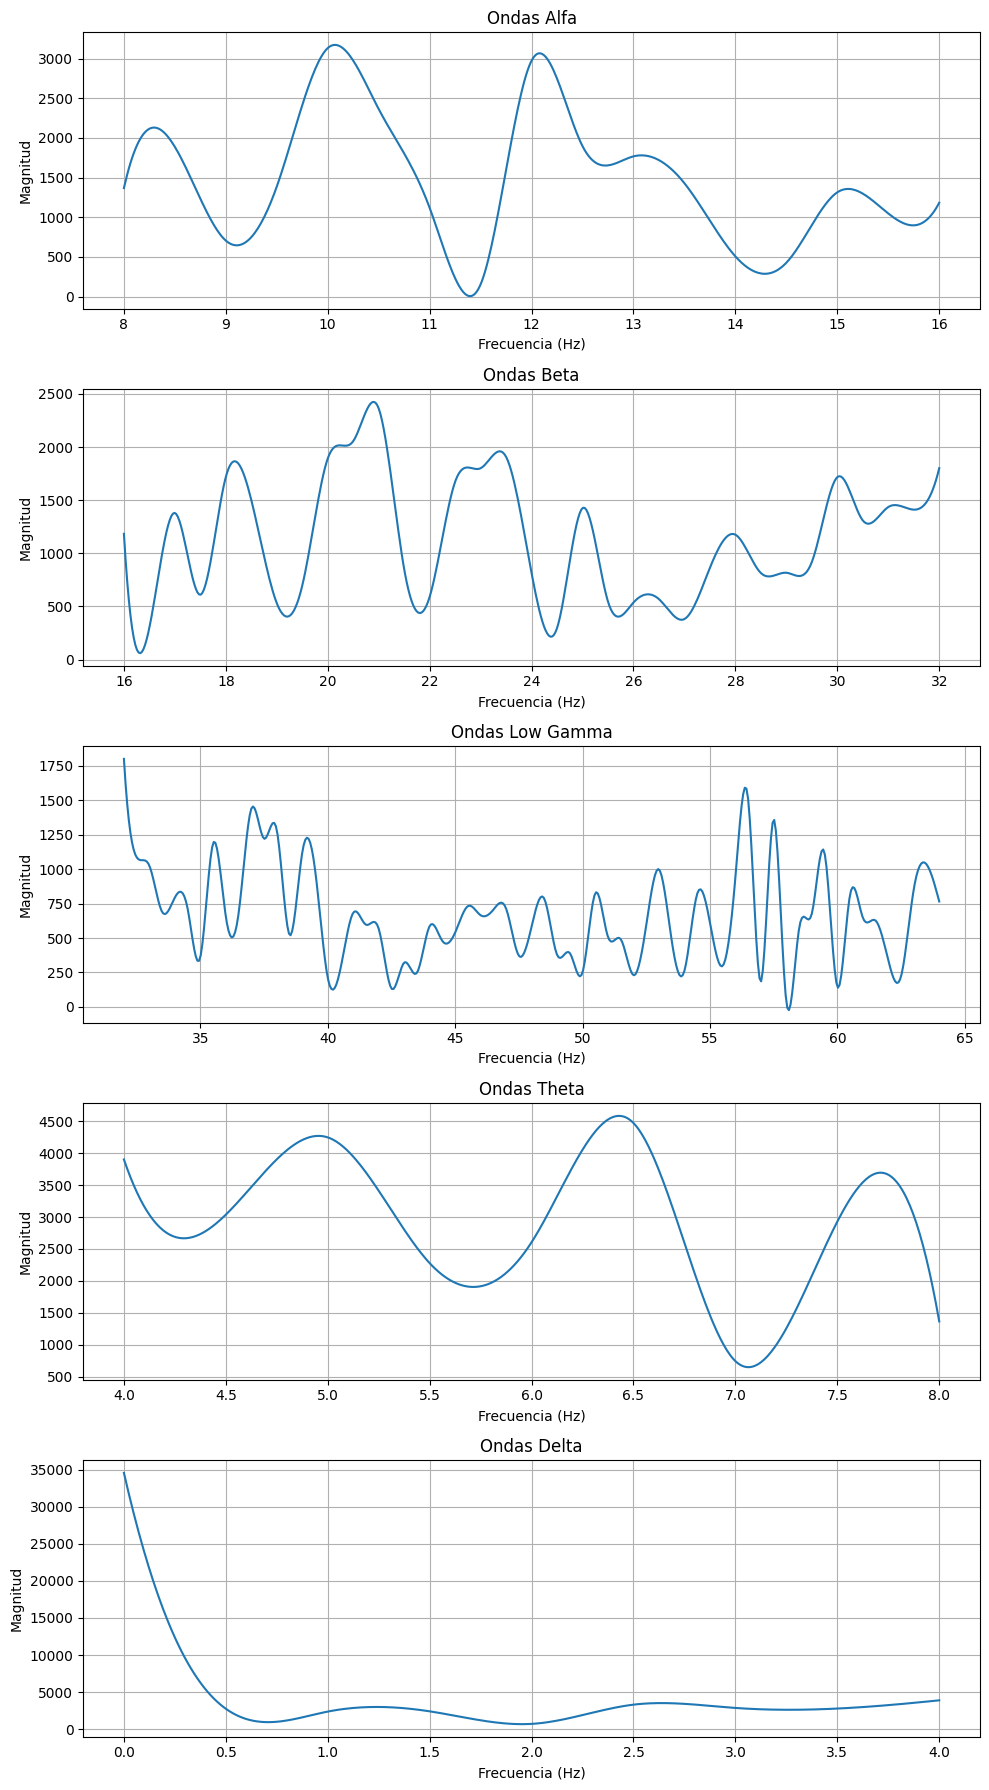

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Supongamos que tienes una columna llamada 'eeg_signal' en tu DataFrame con la señal EEG
# Aquí asumimos que has cargado tus datos en un arreglo numpy llamado 'eeg_data'

# Frecuencia de muestreo (512 Hz)
fs = 512.0

# Duración de la señal en segundos (2 segundos)
t = 2.0

# Número total de puntos en la señal
N = int(fs * t)

# Tiempo de muestreo
dt = 1.0 / fs

# Generar una señal de tiempo (t)
time = np.arange(0, N) * dt

# Aplicar la FFT a la señal EEG
eeg_fft = np.fft.fft(eeg_data)
frequencies = np.fft.fftfreq(N, dt)

# Encontrar los índices correspondientes a las bandas de frecuencia
delta_range = (0, 4) # Ondas delta
theta_range = (4, 8)  # Ondas theta
alpha_range = (8, 16)  # Ondas alfa
beta_range  = (16, 32)  # Ondas beta
low_gamma_range = (32, 64)  # Ondas gamma




# Encontrar los índices correspondientes a los rangos de frecuencia
delta_idx = np.where((frequencies >= delta_range[0]) & (frequencies <= delta_range[1]))[0]
theta_idx = np.where((frequencies >= theta_range[0]) & (frequencies <= theta_range[1]))[0]
alpha_idx = np.where((frequencies >= alpha_range[0]) & (frequencies <= alpha_range[1]))[0]
beta_idx = np.where((frequencies >= beta_range[0]) & (frequencies <= beta_range[1]))[0]
low_gamma_idx = np.where((frequencies >= low_gamma_range[0]) & (frequencies <= low_gamma_range[1]))[0]


# Interpolar los datos para suavizar las curvas
interp_delta = interp1d(frequencies[delta_idx], np.abs(eeg_fft[delta_idx]), kind='cubic')
interp_theta = interp1d(frequencies[theta_idx], np.abs(eeg_fft[theta_idx]), kind='cubic')
interp_alpha = interp1d(frequencies[alpha_idx], np.abs(eeg_fft[alpha_idx]), kind='cubic')
interp_beta = interp1d(frequencies[beta_idx], np.abs(eeg_fft[beta_idx]), kind='cubic')
interp_low_gamma = interp1d(frequencies[low_gamma_idx], np.abs(eeg_fft[low_gamma_idx]), kind='cubic')


# Crear gráficos separados para cada banda de frecuencia
plt.figure(figsize=(10, 18))

# Ondas alfa
plt.subplot(5, 1, 1)
freq_smooth = np.linspace(frequencies[alpha_idx].min(), frequencies[alpha_idx].max(), num=500)
plt.plot(freq_smooth, interp_alpha(freq_smooth))
plt.title('Ondas Alfa')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.grid(True)

# Ondas beta
plt.subplot(5, 1, 2)
freq_smooth = np.linspace(frequencies[beta_idx].min(), frequencies[beta_idx].max(), num=500)
plt.plot(freq_smooth, interp_beta(freq_smooth))
plt.title('Ondas Beta')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.grid(True)

# Ondas gamma
plt.subplot(5, 1, 3)
freq_smooth = np.linspace(frequencies[low_gamma_idx].min(), frequencies[low_gamma_idx].max(), num=500)
plt.plot(freq_smooth, interp_low_gamma(freq_smooth))
plt.title('Ondas Low Gamma')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.grid(True)

# Ondas theta
plt.subplot(5, 1, 4)
freq_smooth = np.linspace(frequencies[theta_idx].min(), frequencies[theta_idx].max(), num=500)
plt.plot(freq_smooth, interp_theta(freq_smooth))
plt.title('Ondas Theta')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.grid(True)

# Ondas theta
plt.subplot(5, 1, 5)
freq_smooth = np.linspace(frequencies[delta_idx].min(), frequencies[delta_idx].max(), num=500)
plt.plot(freq_smooth, interp_delta(freq_smooth))
plt.title('Ondas Delta')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.grid(True)

plt.tight_layout()
plt.show()




In [17]:
import numpy as np
import pywt

# Supongamos que tienes una señal EEG en 'eeg_signal'
# Definir la familia de wavelets y el nivel de descomposición
wavelet = 'db8'  # Puedes elegir otra familia de wavelets
level = 5

# Realizar la DWT
coeffs = pywt.wavedec(eeg_data, wavelet, level=level)

